## Importing Dependencies

In [1]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
#Using GPU with nvidia cuda to enhance tensorflow
#I use this just to increase my execution time. The model can be trained even without this cell.

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Loading and pre-processing data

In [3]:
back_path = 'data/curated/back_only' 
side_path = 'data/curated/side_only'
front_path = 'data/curated/front_only'

back_classes = os.listdir(back_path)
front_classes = os.listdir(front_path)
side_classes = os.listdir(side_path)

## For Back Angle

In [8]:
#use Imagedatagenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2)


back_train_generator = datagen.flow_from_directory(
        back_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='training')  # This will be used for training

back_validation_generator = datagen.flow_from_directory(
        back_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='validation')





Found 363 images belonging to 36 classes.
Found 75 images belonging to 36 classes.


## For Front Angle

In [20]:
front_train_generator = datagen.flow_from_directory(
        front_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='training')  # This will be used for training

front_validation_generator = datagen.flow_from_directory(
        front_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='validation')


Found 161 images belonging to 36 classes.
Found 36 images belonging to 36 classes.


## For Side Angle

In [16]:
side_train_generator = datagen.flow_from_directory(
        side_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='training')  # This will be used for training

side_validation_generator = datagen.flow_from_directory(
        side_path,
        target_size=(250, 250),
        batch_size=8,
        class_mode='categorical',
        subset='validation')


Found 125 images belonging to 18 classes.
Found 24 images belonging to 18 classes.


## Creating model with convolution layers

## For Back Angle

In [5]:
no_of_classes = 36

back_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250,250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', name='Dense'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax', name='Dense_finalLayer')
])

back_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## For Front Angle


In [21]:
no_of_classes = 36

front_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250,250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', name='Dense'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax', name='Dense_finalLayer')
])

front_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## For Side Angle

In [13]:
no_of_classes = 18

side_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250,250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(name='Flatten'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', name='Dense'),
    tf.keras.layers.Dense(no_of_classes, activation='softmax', name='Dense_finalLayer')
])

side_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training and saving the models

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

back_history = back_model.fit(back_train_generator, validation_data=back_validation_generator, epochs=20,
                    steps_per_epoch=len(back_train_generator), callbacks=[early_stopping])

Epoch 1/20
46/46 [==============================] - 8s 161ms/step - loss: 3.5787 - accuracy: 0.0248 - val_loss: 3.5793 - val_accuracy: 0.0400
Epoch 2/20
46/46 [==============================] - 6s 136ms/step - loss: 3.5723 - accuracy: 0.0413 - val_loss: 3.5752 - val_accuracy: 0.0400
Epoch 3/20
46/46 [==============================] - 6s 134ms/step - loss: 3.5733 - accuracy: 0.0303 - val_loss: 3.5695 - val_accuracy: 0.0400
Epoch 4/20
46/46 [==============================] - 6s 135ms/step - loss: 3.5595 - accuracy: 0.0413 - val_loss: 3.5488 - val_accuracy: 0.0800
Epoch 5/20
46/46 [==============================] - 6s 138ms/step - loss: 3.5303 - accuracy: 0.0413 - val_loss: 3.5019 - val_accuracy: 0.0800
Epoch 6/20
46/46 [==============================] - 6s 136ms/step - loss: 3.3891 - accuracy: 0.0992 - val_loss: 3.3853 - val_accuracy: 0.1200
Epoch 7/20
46/46 [==============================] - 6s 138ms/step - loss: 2.9837 - accuracy: 0.1763 - val_loss: 3.4349 - val_accuracy: 0.1067
Epoch 

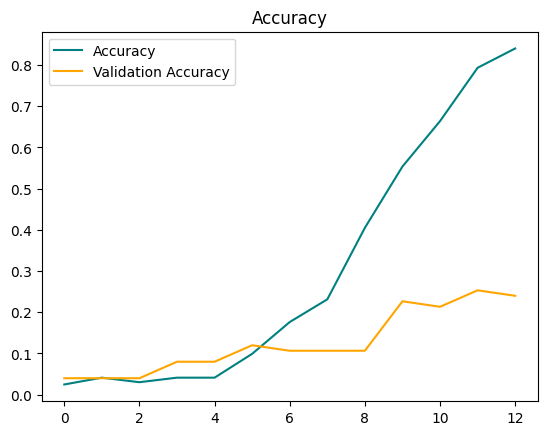

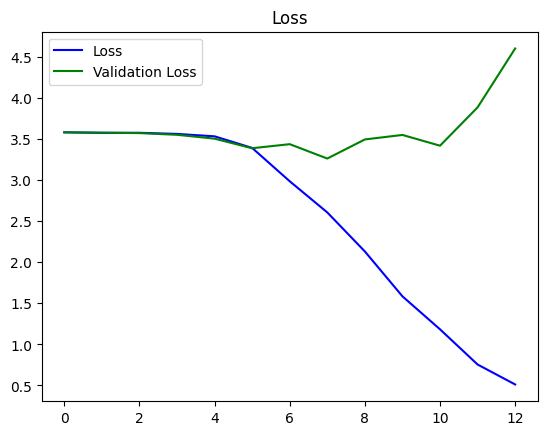

In [11]:
fig = plt.figure()
plt.title('Accuracy')
plt.plot(back_history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(back_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc="upper left")
plt.show()



plt.title('Loss')
plt.plot(back_history.history['loss'], color='blue', label='Loss')
plt.plot(back_history.history['val_loss'], color='green', label='Validation Loss')
plt.legend(loc="upper left")

plt.show()

In [10]:
back_model.save('back_classification_model.h5')

back_model = load_model('back_classification_model.h5')

conv = tf.lite.TFLiteConverter.from_keras_model(back_model)
tfmodel = conv.convert()

open("back_classification_model_lite.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpf_291p40\assets


INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpf_291p40\assets


22714728

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

front_history = front_model.fit(front_train_generator, validation_data=front_validation_generator, epochs=20,
                    steps_per_epoch=len(front_train_generator), callbacks=[early_stopping])

Epoch 1/20
21/21 [==============================] - 2s 107ms/step - loss: 3.5901 - accuracy: 0.0311 - val_loss: 3.5862 - val_accuracy: 0.0278
Epoch 2/20
21/21 [==============================] - 2s 104ms/step - loss: 3.6020 - accuracy: 0.0124 - val_loss: 3.5833 - val_accuracy: 0.0278
Epoch 3/20
21/21 [==============================] - 2s 99ms/step - loss: 3.5910 - accuracy: 0.0497 - val_loss: 3.5828 - val_accuracy: 0.0278
Epoch 4/20
21/21 [==============================] - 2s 101ms/step - loss: 3.5799 - accuracy: 0.0435 - val_loss: 3.5755 - val_accuracy: 0.0278
Epoch 5/20
21/21 [==============================] - 2s 102ms/step - loss: 3.5467 - accuracy: 0.0559 - val_loss: 3.5770 - val_accuracy: 0.0278
Epoch 6/20
21/21 [==============================] - 2s 104ms/step - loss: 3.5023 - accuracy: 0.0559 - val_loss: 3.5384 - val_accuracy: 0.0278
Epoch 7/20
21/21 [==============================] - 2s 104ms/step - loss: 3.4095 - accuracy: 0.0870 - val_loss: 3.5602 - val_accuracy: 0.0278
Epoch 8

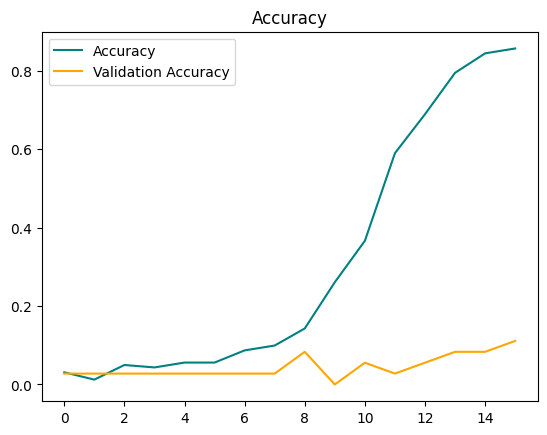

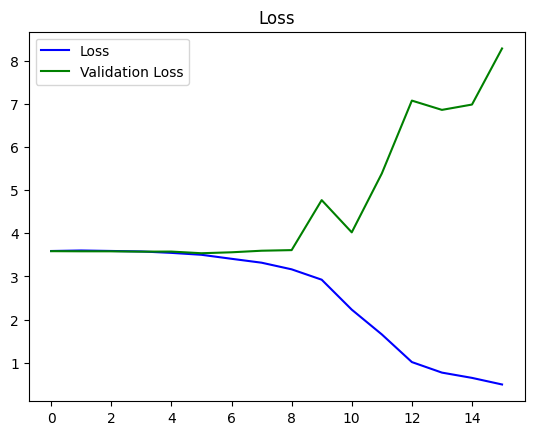

In [24]:
fig = plt.figure()
plt.title('Accuracy')
plt.plot(front_history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(front_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc="upper left")
plt.show()



plt.title('Loss')
plt.plot(front_history.history['loss'], color='blue', label='Loss')
plt.plot(front_history.history['val_loss'], color='green', label='Validation Loss')
plt.legend(loc="upper left")

plt.show()

In [25]:
front_model.save('front_classification_model.h5')

front_model = load_model('front_classification_model.h5')

conv = tf.lite.TFLiteConverter.from_keras_model(front_model)
tfmodel = conv.convert()

open("front_classification_model_lite.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpwwfxuywp\assets


INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpwwfxuywp\assets


22714872

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

side_history = side_model.fit(side_train_generator, validation_data=side_validation_generator, epochs=20,
                    steps_per_epoch=len(side_train_generator), callbacks=[early_stopping])

Epoch 1/20


C:\Users\Nikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 3s 158ms/step - loss: 3.5209 - accuracy: 0.0640 - val_loss: 2.8871 - val_accuracy: 0.0833
Epoch 2/20
16/16 [==============================] - 2s 94ms/step - loss: 2.8786 - accuracy: 0.0800 - val_loss: 2.8708 - val_accuracy: 0.0833
Epoch 3/20
16/16 [==============================] - 2s 97ms/step - loss: 2.8556 - accuracy: 0.0880 - val_loss: 2.8639 - val_accuracy: 0.0833
Epoch 4/20
16/16 [==============================] - 2s 92ms/step - loss: 2.8504 - accuracy: 0.0800 - val_loss: 2.8672 - val_accuracy: 0.1250
Epoch 5/20
16/16 [==============================] - 2s 93ms/step - loss: 2.8404 - accuracy: 0.1120 - val_loss: 2.8608 - val_accuracy: 0.1250
Epoch 6/20
16/16 [==============================] - 2s 96ms/step - loss: 2.8312 - accuracy: 0.1200 - val_loss: 2.8529 - val_accuracy: 0.1250
Epoch 7/20
16/16 [==============================] - 2s 94ms/step - loss: 2.8114 - accuracy: 0.1200 - val_loss: 2.8643 - val_accuracy: 0.1250
Epoch 8/20
16/16 [=====

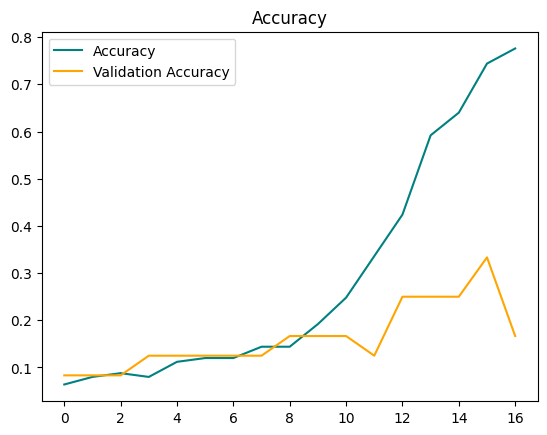

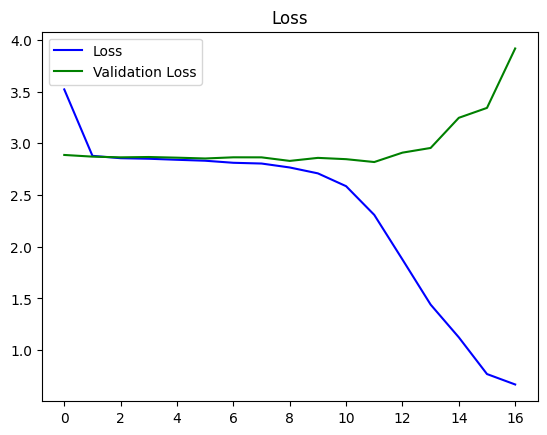

In [18]:
fig = plt.figure()
plt.title('Accuracy')
plt.plot(side_history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(side_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc="upper left")
plt.show()



plt.title('Loss')
plt.plot(side_history.history['loss'], color='blue', label='Loss')
plt.plot(side_history.history['val_loss'], color='green', label='Validation Loss')
plt.legend(loc="upper left")

plt.show()

In [19]:
side_model.save('side_classification_model.h5')

side_model = load_model('side_classification_model.h5')

conv = tf.lite.TFLiteConverter.from_keras_model(side_model)
tfmodel = conv.convert()

open("side_classification_model_lite.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpv98lrr9c\assets


INFO:tensorflow:Assets written to: C:\Users\Nikesh\AppData\Local\Temp\tmpv98lrr9c\assets


22696360

## Testing the models

In [ ]:
img = cv2.imread('data/curated/back_only/Front_Ford_Mustang_2013-2014/TTT.jpg')



from PIL import Image
img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img_rgba = img_pil.convert('RGBA')

# Resize the image to the required input size
resized = img_rgba.resize((250, 250), Image.ANTIALIAS)

# Convert the image back to RGB format (if needed for displaying with matplotlib)
resized_rgb = resized.convert('RGB')
plt.imshow(np.array(resized_rgb))
plt.show()



In [ ]:
resized = np.array(resized_rgb) / 255.0  # Convert to float and rescale to [0, 1]
resized = np.expand_dims(resized, 0)  # Add batch dimension
resized_tensor = tf.convert_to_tensor(resized, dtype=tf.float32)

test_predict = front_model.predict(resized_tensor)

# Get the predicted class label
predicted_class_index = np.argmax(test_predict[0])
predicted_class = front_classes[predicted_class_index]
print('Predicted Car:', predicted_class)